In [1]:
#READING NECESSARY LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report




In [2]:
#READING DATASET

df = pd.read_csv('drug200.csv', encoding='utf-8')
print(df.info())

#how many rows and features 
rows, features=df.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [3]:
#PREPROCESSING

 

#replace different types of missing values with NaN
df.replace(
    to_replace=["", " ", "NA", "null", "None", "N/A", "missing"],
    value=np.nan,
    inplace=True
)

#drop columns where target is null

target_col = 'Drug'  
df = df[df[target_col].notna()]

#make separate dataframes for features and target variable
df_features = df.drop(columns=[target_col])
df_target = df[target_col]

#splitting the columns of features dataset into numerical and categorical features
numerical_features = df_features.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df_features.select_dtypes(include=['object', 'category']).columns.tolist()



In [4]:
# SPLITING THE DATASET

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=42, stratify=df_target)

In [5]:

#setting up imputer to handle missing values
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

#handle missing values
if numerical_features:
    X_train[numerical_features] = numerical_imputer.fit_transform(X_train[numerical_features])
    X_test[numerical_features] = numerical_imputer.transform(X_test[numerical_features])

if categorical_features:
    df_features[categorical_features] = categorical_imputer.fit_transform(df_features[categorical_features])

#Encoding categorical features using LabelEncoder (in-place)
if categorical_features:
    for col in categorical_features:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])

# Encoding target variable if categorical
if df_target.dtype == 'object' or str(df_target.dtype) == 'category':
    target_encoder = LabelEncoder()
    y_train_encoded = target_encoder.fit_transform(y_train.astype(str))
    y_test_encoded = target_encoder.transform(y_test.astype(str))

    y_train = pd.Series(y_train_encoded, name='y_train')
    y_test = pd.Series(y_test_encoded, name='y_test')

    inverse_mapping = {idx: label for idx, label in enumerate(target_encoder.classes_)}

# Scaling numerical features
if numerical_features:
    scaler = StandardScaler()
    scaled_train_array = scaler.fit_transform(X_train[numerical_features])
    scaled_test_array = scaler.transform(X_test[numerical_features])

    scaled_train_df = pd.DataFrame(scaled_train_array, columns=numerical_features, index=X_train.index)
    scaled_test_df = pd.DataFrame(scaled_test_array, columns=numerical_features, index=X_test.index)

    # Replace original numerical columns in X_train and X_test with scaled versions
    X_train.update(scaled_train_df)
    X_test.update(scaled_test_df)

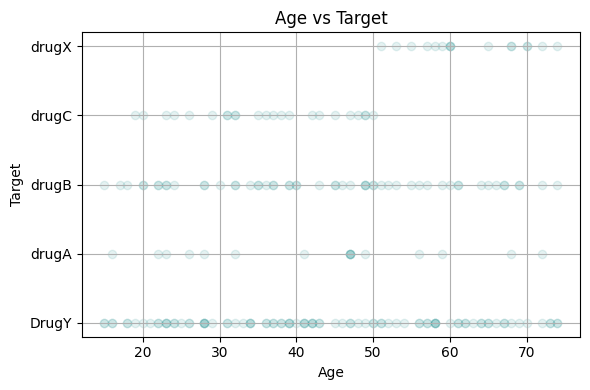

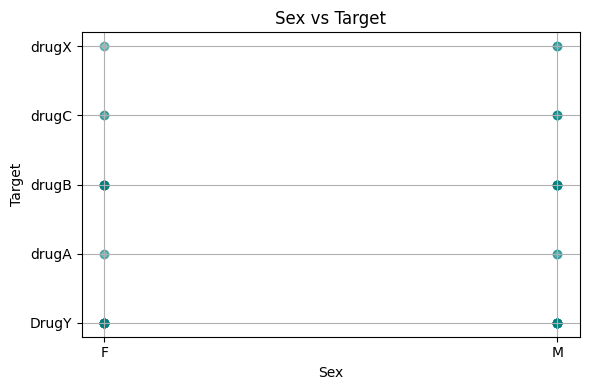

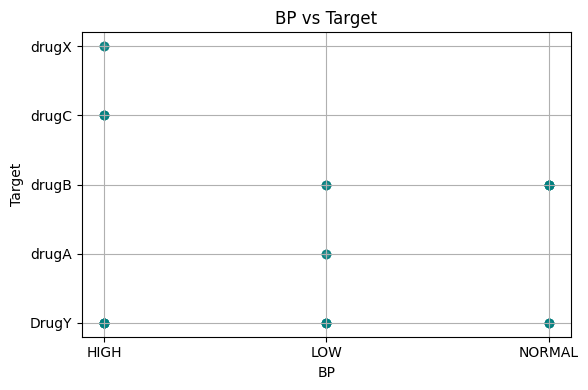

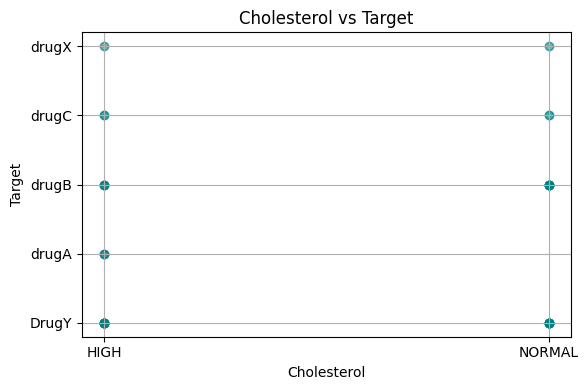

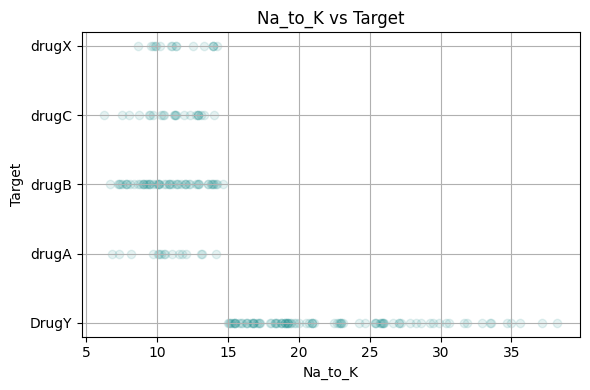

In [6]:
#DATA VISUALIZATION

for col in df_features.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(df_features[col], df_target, alpha=0.1, color='teal')
    #use the id for yticks and the label for label on y axis
    plt.yticks(ticks=list(inverse_mapping.keys()),labels=[inverse_mapping[i] for i in inverse_mapping])

    plt.xlabel(col)
    plt.ylabel("Target")
    plt.title(f"{col} vs Target")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [7]:
#TRAINING THE MODEL

#using SVM for classification
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)



SVC()

In [8]:
#EVALUATING MODEL

#making predictions on the test set
y_pred = model.predict(X_test)


# Accuracy 
print("Accuracy (Exact Match):", accuracy_score(y_test, y_pred))

# Full label-wise precision, recall, f1
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy (Exact Match): 0.975

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       0.92      1.00      0.96        11

    accuracy                           0.97        40
   macro avg       0.98      0.99      0.99        40
weighted avg       0.98      0.97      0.98        40



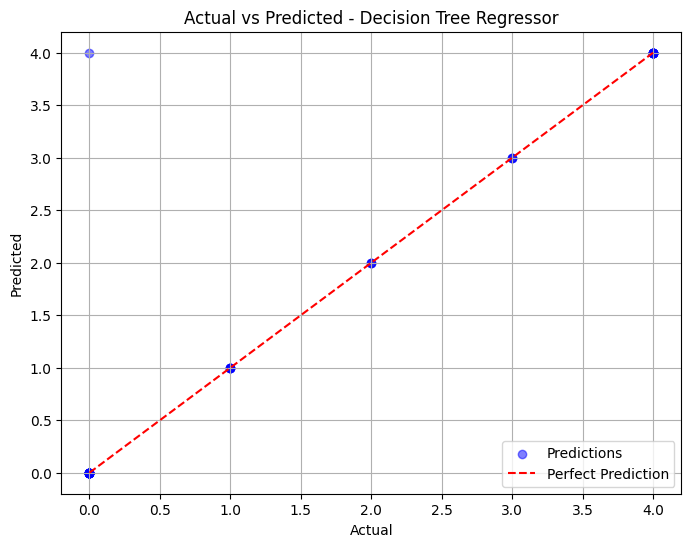

In [9]:
#DATA VISUALIZATION



# Scatter plot of predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.5, label='Predictions')

# Perfect prediction line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')



# Labels and title
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Decision Tree Regressor")
plt.grid(True)
plt.legend()
plt.show()